In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import ImageFilter
%matplotlib inline

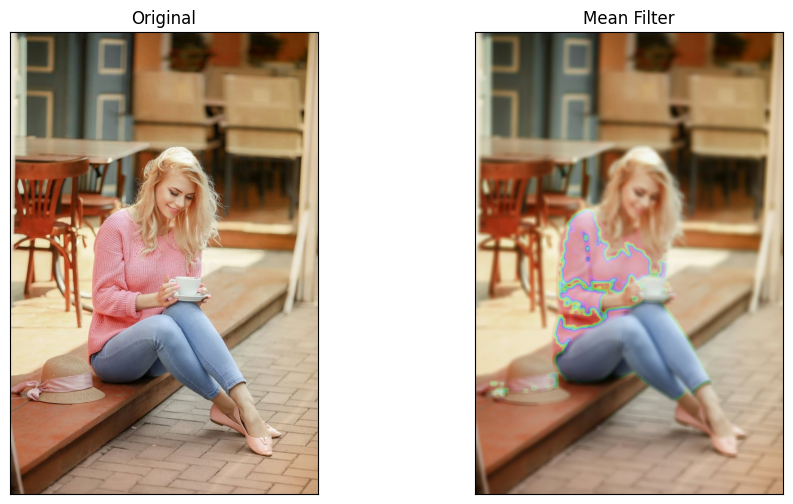

In [22]:
image = cv2.imread('images.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
figure_size = 9
new_image = cv2.blur(image, (figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2. cvtColor(image, cv2.COLOR_HSV2RGB)), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)), plt.title('Mean Filter')
plt.xticks([]), plt.yticks([])
plt.show()


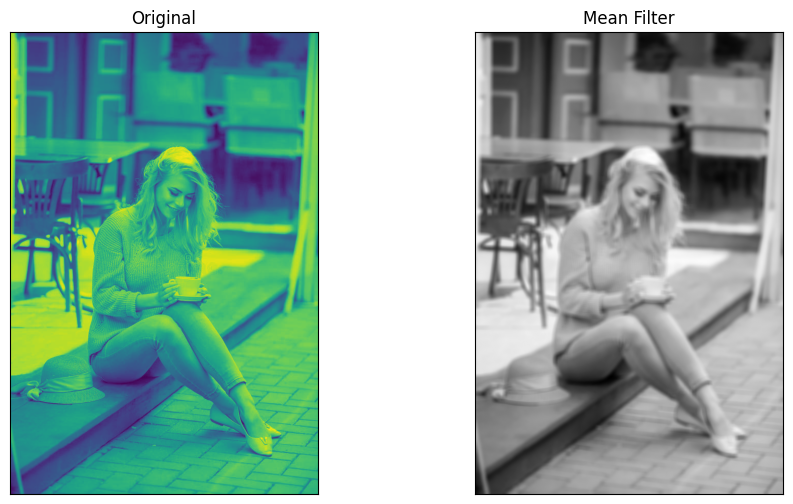

In [23]:
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2, (figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap = 'gray'), plt.title('Mean Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Filtering using Gaussian Filter

#### The Gaussian filter is very similar to the mean filter, but it involves a weighted mean of the pixels with a parameter as sigma

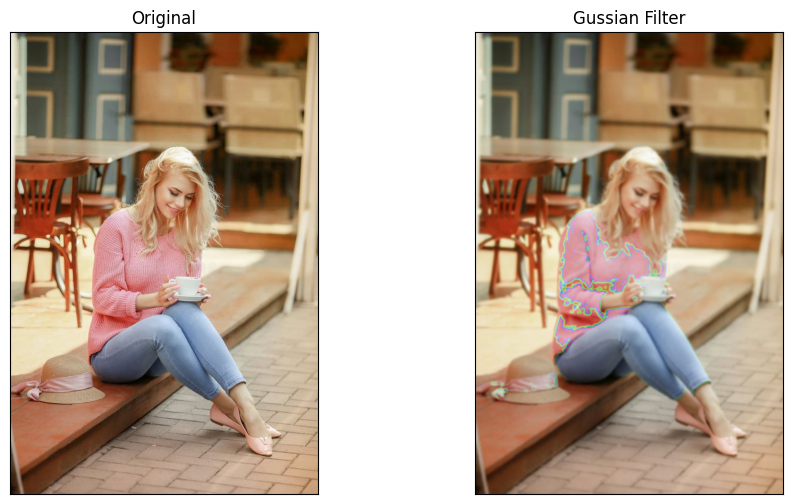

In [24]:
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2. cvtColor(image, cv2.COLOR_HSV2RGB)), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)), plt.title('Gussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()


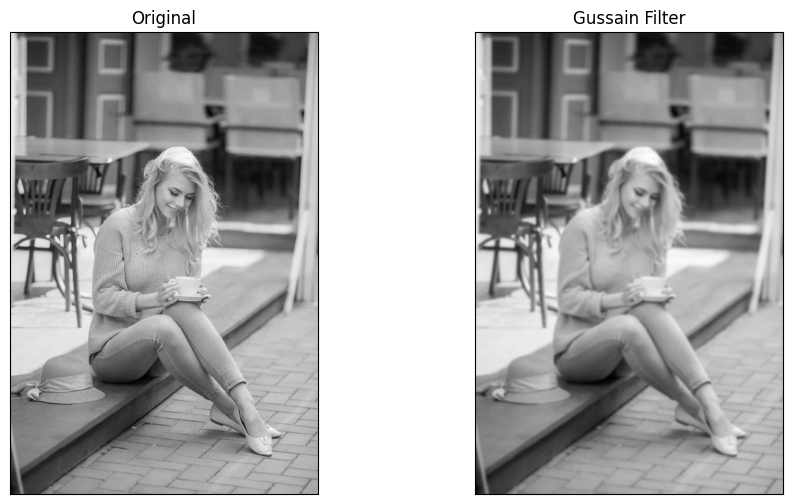

In [25]:
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap = 'gray'), plt.title('Gussain Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Filtering using Median Filter

#### The median filter computes the median of the intensity of pixels. It then replaces the norm with the pixel intensity of mean pixels.

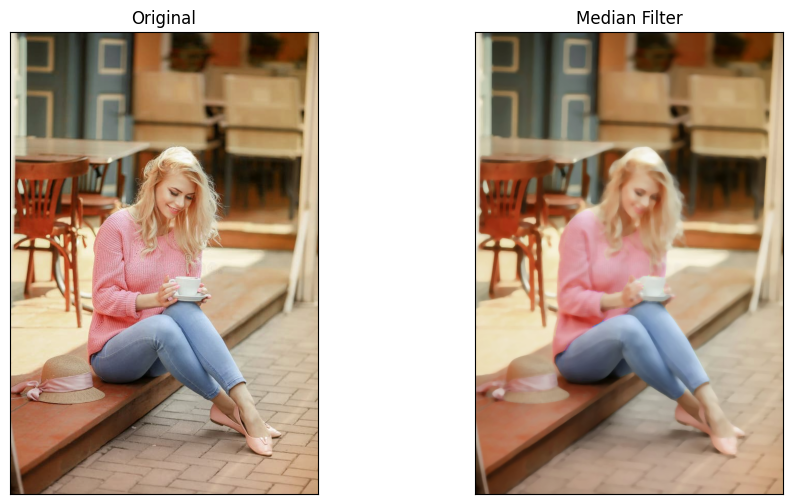

In [26]:
new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2. cvtColor(image, cv2.COLOR_HSV2RGB)), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)), plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()


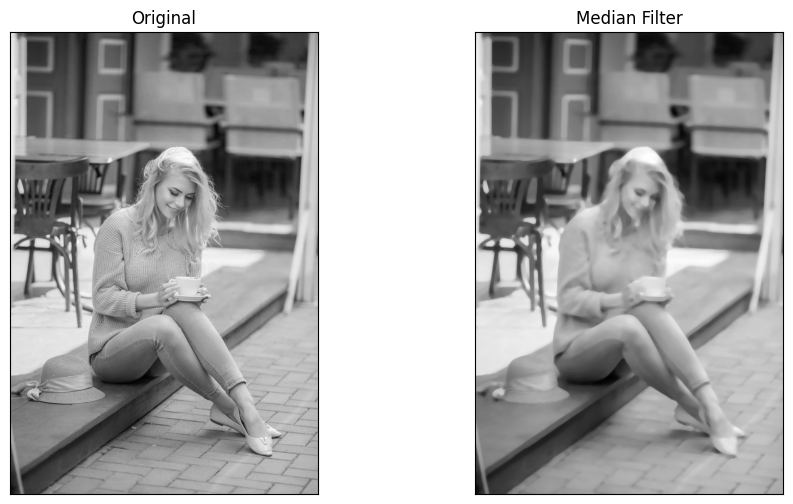

In [27]:
new_image_median = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_median, cmap = 'gray'), plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
import numpy as np

def kunal_effect(image, filter_size=3):
    indexer = filter_size // 2
    new_image = image.copy()
    rows, cols = image.shape

    for i in range(rows):
        for j in range(cols):
            neighbors = []

            for x in range(i - indexer, i + indexer + 1):
                for y in range(j - indexer, j + indexer + 1):
                    if 0 <= x < rows and 0 <= y < cols:
                        neighbors.append(image[x, y])

            if len(neighbors) > 1:
                neighbors.remove(image[i, j])

                min_val = min(neighbors)
                max_val = max(neighbors)

                if image[i, j] > max_val:
                    new_image[i, j] = max_val
                elif image[i, j] < min_val:
                    new_image[i, j] = min_val

    return new_image


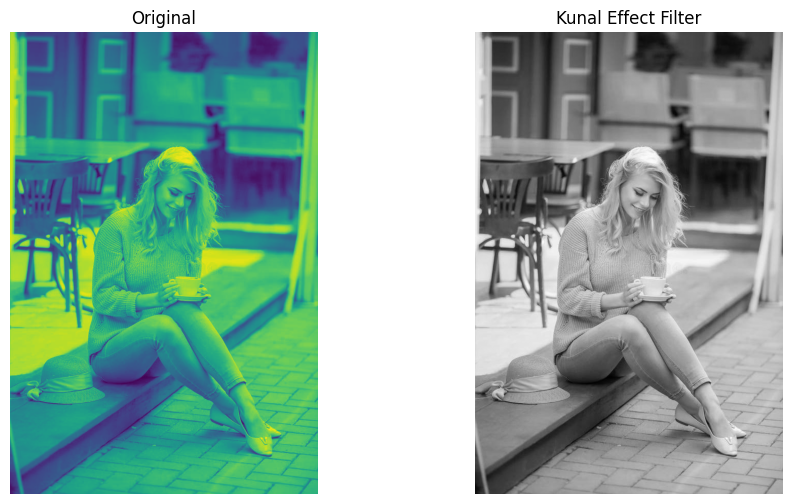

In [32]:
new_image = kunal_effect(image2, 5)

plt.figure(figsize=(11, 6))
plt.subplot(121)
plt.imshow(image2)
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(new_image, cmap='gray')
plt.title('Kunal Effect Filter')
plt.axis('off')

plt.show()



In [29]:
def kunal_wow_filter(img):
    img = img.astype(np.float32) / 255.0
    
    img = cv2.pow(img, 1.3)
    
    img[:, :, 2] *= 1.15
    img[:, :, 1] += 1.10
    
    img = np.clip(img, 0, 1)
    
    blur = cv2.GaussianBlur(img, (0,0), sigmaX=15, sigmaY=15)
    wow = cv2.addWeighted(img, 1.4, blur, -0.4, 0)
    
    wow = np.clip(wow * 255, 0, 255).astype(np.uint8)
    return wow

C:\Users\kunal\AppData\Local\Temp\ipykernel_20316\3111167544.py:24: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kunal\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


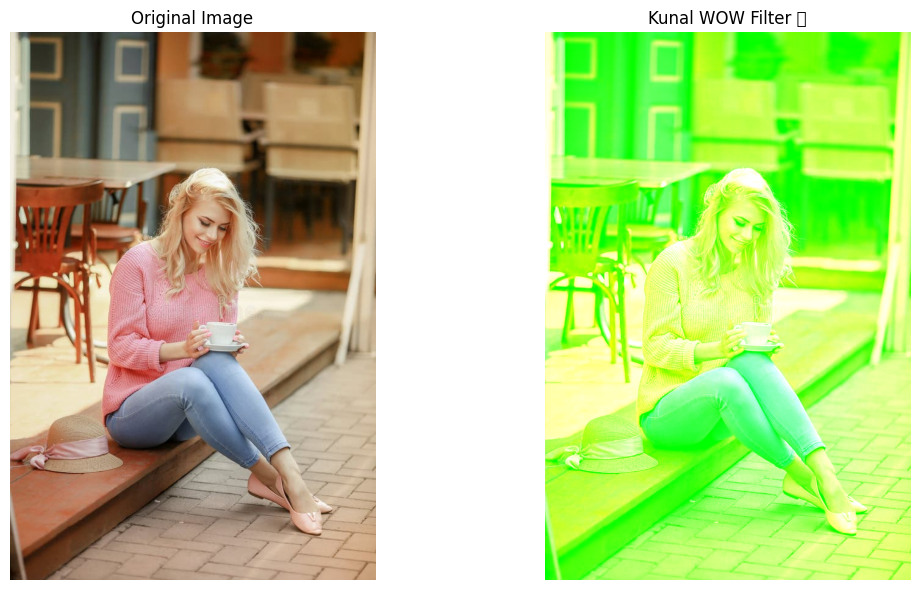

In [33]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images.jpg")


wow_img = kunal_wow_filter(img)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
wow_rgb = cv2.cvtColor(wow_img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wow_rgb)
plt.title("Kunal WOW Filter 🔥")
plt.axis("off")

plt.tight_layout()
plt.show()
